# Black Friday Sales

## Model Building And Prediction

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
traindf = pd.read_csv(r"traindf.csv")
testdf = pd.read_csv(r"testdf.csv")

In [ ]:
traindf

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [ ]:
testdf

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN


In [ ]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [ ]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


In [ ]:
print('Shape: ',traindf.shape)
print('Shape: ',testdf.shape)

Shape:  (550068, 12)
Shape:  (233599, 11)


In [ ]:
traindf.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [ ]:
testdf.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

# Combining train and test data to avoid repeating preprocessing steps for both dataframes

In [ ]:
traindf['source']='traindf'
testdf['source']='testdf'
data = pd.concat([traindf, testdf], ignore_index = True,sort=False)
data.shape

(783667, 13)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
 12  source                      783667 non-null  object 
dtypes: float64(3),

# Missing values

### Filling the missing values with zero

In [ ]:
data.Product_Category_2.fillna(0, inplace = True)
data.Product_Category_3.fillna(0, inplace = True)

In [ ]:
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,source
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370.0,traindf
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,traindf
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422.0,traindf
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057.0,traindf
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969.0,traindf
...,...,...,...,...,...,...,...,...,...,...,...,...,...
783662,1006036,P00118942,F,26-35,15,B,4+,1,8,0.0,0.0,NaN,testdf
783663,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,0.0,NaN,testdf
783664,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN,testdf
783665,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,0.0,NaN,testdf


# Data Types

### 'Product_Category_2' and 'Product_Category_3' has floating point numbers which can be converted into int type

In [ ]:
print('Product cat1:',data['Product_Category_1'].unique())
print('Product cat2:',data['Product_Category_2'].unique())
print('Product cat3:',data['Product_Category_3'].unique())

Product cat1: [ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19]
Product cat2: [ 0.  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]
Product cat3: [ 0. 14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.]


In [ ]:
data.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
source                         object
dtype: object

In [ ]:
data[['Product_Category_2','Product_Category_3']] = data[['Product_Category_2','Product_Category_3']].astype(int)

# Using Label encoder for categorical values

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
LE_Gender = LabelEncoder()
data['Gender']=LE_Gender.fit_transform(data['Gender'])

In [ ]:
LE_Gender.classes_

array(['F', 'M'], dtype=object)

In [ ]:
LE_Age = LabelEncoder()
data['Age']=LE_Age.fit_transform(data['Age'])

In [ ]:
LE_Age.classes_

array(['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'],
      dtype=object)

In [ ]:
LE_City = LabelEncoder()
data['City_Category']= LE_City.fit_transform(data['City_Category'])

In [ ]:
LE_City.classes_

array(['A', 'B', 'C'], dtype=object)

In [ ]:
data[['Stay_In_Current_City_Years']] = data[['Stay_In_Current_City_Years']].replace('4+' , 4 )

In [ ]:
data.Stay_In_Current_City_Years = data.Stay_In_Current_City_Years.astype(int)

In [ ]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,source
0,1000001,P00069042,0,0,10,0,2,0,3,0,0,8370.0,traindf
1,1000001,P00248942,0,0,10,0,2,0,1,6,14,15200.0,traindf
2,1000001,P00087842,0,0,10,0,2,0,12,0,0,1422.0,traindf
3,1000001,P00085442,0,0,10,0,2,0,12,14,0,1057.0,traindf
4,1000002,P00285442,1,6,16,2,4,0,8,0,0,7969.0,traindf


# Outliers

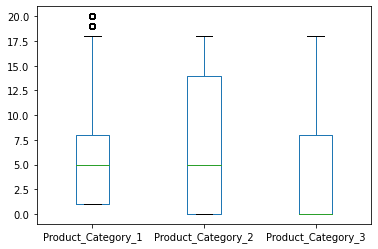

In [ ]:
data[['Product_Category_1','Product_Category_2','Product_Category_3']].plot.box()

### We can see that we have outliers above 19 range

In [ ]:
data = data[data['Product_Category_1'] < 19] 

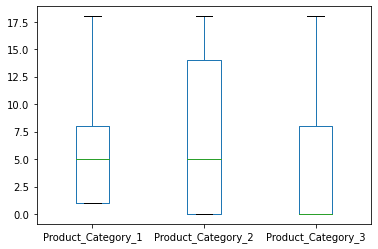

In [ ]:
data[['Product_Category_1','Product_Category_2','Product_Category_3']].plot.box()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 779514 entries, 0 to 783666
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     779514 non-null  int64  
 1   Product_ID                  779514 non-null  object 
 2   Gender                      779514 non-null  int32  
 3   Age                         779514 non-null  int32  
 4   Occupation                  779514 non-null  int64  
 5   City_Category               779514 non-null  int32  
 6   Stay_In_Current_City_Years  779514 non-null  int32  
 7   Marital_Status              779514 non-null  int64  
 8   Product_Category_1          779514 non-null  int64  
 9   Product_Category_2          779514 non-null  int32  
 10  Product_Category_3          779514 non-null  int32  
 11  Purchase                    545915 non-null  float64
 12  source                      779514 non-null  object 
dtypes: float64(1),

# Again divide the dataset into train and test resp.

In [ ]:
#Divide into test and train:
traindf = data.loc[data.source=='traindf']
testdf = data.loc[data.source=='testdf']
#Drop unnecessary columns:
testdf.drop('source',axis=1,inplace=True,errors = 'ignore')
traindf.drop('source',axis=1,inplace=True, errors = 'ignore')

C:\Users\Aniket\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
traindf.Purchase = traindf.Purchase.astype(int)

C:\Users\Aniket\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


### Removing Purchase column from test dataframe cause it has nan values and also the user_id and Product_id which are not necessary

In [ ]:
cols = ['Purchase']
testdf.drop(cols, inplace = True, axis=1)

In [ ]:
col = ['User_ID','Product_ID']
traindf.drop(col, inplace=True, axis=1)
testdf.drop(col, inplace=True, axis=1)

In [ ]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 545915 entries, 0 to 545914
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   Gender                      545915 non-null  int32
 1   Age                         545915 non-null  int32
 2   Occupation                  545915 non-null  int64
 3   City_Category               545915 non-null  int32
 4   Stay_In_Current_City_Years  545915 non-null  int32
 5   Marital_Status              545915 non-null  int64
 6   Product_Category_1          545915 non-null  int64
 7   Product_Category_2          545915 non-null  int32
 8   Product_Category_3          545915 non-null  int32
 9   Purchase                    545915 non-null  int32
dtypes: int32(7), int64(3)
memory usage: 31.2 MB


In [ ]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233599 entries, 550068 to 783666
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   Gender                      233599 non-null  int32
 1   Age                         233599 non-null  int32
 2   Occupation                  233599 non-null  int64
 3   City_Category               233599 non-null  int32
 4   Stay_In_Current_City_Years  233599 non-null  int32
 5   Marital_Status              233599 non-null  int64
 6   Product_Category_1          233599 non-null  int64
 7   Product_Category_2          233599 non-null  int32
 8   Product_Category_3          233599 non-null  int32
dtypes: int32(6), int64(3)
memory usage: 12.5 MB


# Data is clean

### Splitting the train dataset.

In [ ]:
X = traindf.iloc[:, :-1]
Y = traindf["Purchase"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X, Y, test_size = 0.20, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

 ## Model Building and Predicting

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import GradientBoostingRegressor

### Multiple Regression

In [ ]:
# Fitting Multiple Regression to Dataset
Linearreg = LinearRegression()
Linearreg.fit(X_train, Y_train)

# Predicting the Purchase Value for Linear Regressor
y_predMR = Linearreg.predict(X_test)

# finding the mean_squared error
mse = mean_squared_error(Y_test, y_predMR)
print("RMSE Error:", np.sqrt(mse))


RMSE Error: 4645.917959183987


### Polynomial Regression

In [ ]:
# Fitting Polynomial Regression to Dataset
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly, Y_train)

# Predicting the Purchase Values for Polynomial Regressor
y_predPR = regressor.predict(poly_reg.fit_transform(X_test))


# Root_mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(Y_test, y_predPR))
print(rmse)


17730632903189.832


### Decision Tree Regression

In [ ]:
# Fitting Decision Tree Regression to Dataset
Tree_regressor = DecisionTreeRegressor(random_state = 5)
Tree_regressor.fit(X_train, Y_train)

# Predicting Purchase value for Decision Tree Regressor
y_predDTR = Tree_regressor.predict(X_test)

# finding the mean_squared error
mse = mean_squared_error(Y_test, y_predDTR)
print("RMSE Error:", np.sqrt(mse))


RMSE Error: 3327.5476044322445


### Random Forest

In [ ]:
# Fitting Random Forest Regression to Dataset
Randomregressor = RandomForestRegressor(n_estimators = 600, random_state = 0, max_depth = 9)
Randomregressor.fit(X_train, Y_train)

#Predicting Purchase Value For Random Forest Regressor
y_predRFR = Randomregressor.predict(X_test)

# finding the mean_squared error
mse = mean_squared_error(Y_test, y_predRFR)
print("RMSE Error:", np.sqrt(mse))


RMSE Error: 2955.154685965708


### Gradient Boosting

In [ ]:
# Fitting Gradient Boosting Regression to Dataset
model = GradientBoostingRegressor(n_estimators= 600,max_depth = 9)
model.fit(X_train, Y_train)

# Predicting Purchase value from Gradient Boosting Regressor
y_predGBR = model.predict(X_test)


# finding the mean_squared error
mse = mean_squared_error(Y_test, y_predGBR)
print("RMSE Error:", np.sqrt(mse))


RMSE Error: 2871.1067631741057


### Looking at all the Algorithms Gradient Boosting has the lowest Root Mean Squared Error  value.

### Predicting the Purchase value for test data using the Gradient Boosting Algorithm.

In [ ]:
y_testpred = model.predict(testdf)

In [ ]:
y_testpred

array([17745.34003946, 17414.17399961,  4408.50099246, ...,
       19297.94840158,  4478.42432972,  2694.22697014])